# Most efficient cultural holiday in Florence - Part 2

### by Francesca Scalese

**NOTE:** This is the second part of the week 4 final assignment. Only data used in this project will be talked about. The full project will be published in the week 5 assignment

## 2. Data acquisition and cleaning

### 2.1 Data source

The source of data about the location of museums, churches and hotels is the website [Foursquare](https://foursquare.com/).

The dataframe about cultural sites will be used to create clusters, in order to find the zone with the highest content of these sites. Then the data frame with hotels will be overlapped to find wich hotels are in the zone with most cultural sites.

### 2.2 Importing, cleaning data and feature selection

 **2.2.1 Import needed libraries**

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 10.8 MB/s eta 0:00:01
  Created wheel for folium: file

**2.2.2 Define Foursquare Credentials and Version**

In order to use Foursquare to acquiring data, it is needed to define credentials  and versions:

In [ ]:
CLIENT_ID = 'Y2E14U4GP44DD3R0E1MLC51OSZ33I0QUJ1RTVXFGM2Y4NZBB' 
CLIENT_SECRET = '3LJYB5GP2QSSJ04W5F2ZGWOSVPOIVRN0FUMQ1IQYORDZ2OD4' 
ACCESS_TOKEN = 'SBC5N30W3PLCPW5RNKMJBRM3HYTAZRO4LMUHMYIARTS13MEM' 
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Florence is the city the client is interested in. Therefore, it will be our starting point. Its coordinates will be defined using geocode. In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent foursquare_agent, as shown below.

**Note:** *Firenze, Toscana* is the italian name for *Florence, Tuscany*

In [ ]:
address = 'Firenze, Toscana'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

**2.2.3 Searching museums and creating a dataframe**

Now define a query to search museums in Florence(in italian *museo* means museum).

In [4]:
search_query_museum = 'Museo'
radius = 500
print(search_query_museum + ' .... OK!')

Museo .... OK!


Define the corresponding URL

In [5]:
url_museum = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query_museum, radius, LIMIT)
url_museum

'https://api.foursquare.com/v2/venues/search?client_id=Y2E14U4GP44DD3R0E1MLC51OSZ33I0QUJ1RTVXFGM2Y4NZBB&client_secret=3LJYB5GP2QSSJ04W5F2ZGWOSVPOIVRN0FUMQ1IQYORDZ2OD4&ll=43.7698712,11.2555757&oauth_token=SBC5N30W3PLCPW5RNKMJBRM3HYTAZRO4LMUHMYIARTS13MEM&v=20180604&query=Museo&radius=500&limit=30'

Send the GET Request and examine the results

In [6]:
results_museum = requests.get(url_museum).json()
results_museum

{'meta': {'code': 200, 'requestId': '60aff3f04162014f0978cbdb'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4e8026c577c8c61e00ca31c5',
    'name': 'Gucci Museo',
    'location': {'address': 'Piazza Della Signoria, 10',
     'lat': 43.76976229374217,
     'lng': 11.256747341104528,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.76976229374217,
       'lng': 11.256747341104528}],
     'distance': 94,
     'postalCode': '50122',
     'cc': 'IT',
     'city': 'Firenze',
     'state': 'Toscana',
     'country': 'Italia',
     'formattedAddress': ['Piazza Della Signoria, 10',
      '50122 Firenze Toscana',
      'Italia']},
    'categories': [{'id': '4bf58dd8d48988d181941735',
      'name': 'Museum',
      'pluralName': 'Museums',
      'shortName': 'Museum',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_',
       'suffix': '.png'},
      'primary': True}],
    'ref

Get relevant part of JSON and transform it into a pandas dataframe

In [7]:
# assign relevant part of JSON to venues
venues_museum = results_museum['response']['venues']

# tranform venues into a dataframe
df_museum = json_normalize(venues_museum)
df_museum.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


id  \
0  4e8026c577c8c61e00ca31c5   
1  4bd00aa8b221c9b6c80cd3d0   
2  53524fb4498eb5c71458096a   
3  4b49d545f964a520507426e3   
4  4bd01a269854d13a1620f74d   

                                                name  \
0                                        Gucci Museo   
1                         Museo dell'Opera del Duomo   
2            Museo di Palazzo Vecchio (Museo Civico)   
3                       Museo Nazionale del Bargello   
4  Museo Galileo - Istituto e Museo di Storia del...   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d181941735', 'name': 'M...  v-1622143984    False   
1  [{'id': '4bf58dd8d48988d181941735', 'name': 'M...  v-1622143984    False   
2  [{'id': '4bf58dd8d48988d18f941735', 'name': 'A...  v-1622143984    False   
3  [{'id': '4bf58dd8d48988d18f941735', 'name': 'A...  v-1622143984    False   
4  [{'id': '4bf58dd8d48988d191941735', 'name': 'S...  v-1622143984    False   

            location.address  location.lat  location.lng  \
0  Piazza Della Signoria, 10     43.769762     11.256747   
1       Via della Canonica 1     43.772988     11.257492   
2      Piazza della Signoria     43.769422     11.256502   
3      Via del Proconsolo, 4     43.770058     11.258340   
4         Piazza dei Giudici     43.767799     11.256202   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 43.76976229374217...                 94   
1  [{'label': 'display', 'lat': 43.77298793077224...                379   
2  [{'label': 'display', 'lat': 43.7694221597928,...                 89   
3  [{'label': 'display', 'lat': 43.77005835195692...                223   
4  [{'label': 'display', 'lat': 43.76779899076643...                236   

  location.postalCode location.cc location.city location.state  \
0               50122          IT       Firenze        Toscana   
1               50122          IT       Firenze        Toscana   
2                 NaN          IT       Firenze        Toscana   
3               50122          IT       Firenze        Toscana   
4               50122          IT       Firenze        Toscana   

  location.country                          location.formattedAddress  \
0           Italia  [Piazza Della Signoria, 10, 50122 Firenze Tosc...   
1           Italia  [Via della Canonica 1 (Via dei Servi), 50122 F...   
2           Italia   [Piazza della Signoria, Firenze Toscana, Italia]   
3           Italia  [Via del Proconsolo, 4, 50122 Firenze Toscana,...   
4           Italia  [Piazza dei Giudici, 50122 Firenze Toscana, It...   

  location.crossStreet location.neighborhood  
0                  NaN                   NaN  
1        Via dei Servi                   NaN  
2                  NaN                   NaN  
3                  NaN                   NaN  
4                  NaN                   NaN

Define information of interest and filter dataframe

In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_museum = ['name', 'categories'] + [col for col in df_museum.columns if col.startswith('location.')] + ['id']
df_museum_filtered = df_museum.loc[:, filtered_columns_museum]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_museum_filtered['categories'] = df_museum_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_museum_filtered.columns = [column.split('.')[-1] for column in df_museum_filtered.columns]

df_museum_filtered.head()

name      categories  \
0                                        Gucci Museo          Museum   
1                         Museo dell'Opera del Duomo          Museum   
2            Museo di Palazzo Vecchio (Museo Civico)      Art Museum   
3                       Museo Nazionale del Bargello      Art Museum   
4  Museo Galileo - Istituto e Museo di Storia del...  Science Museum   

                     address        lat        lng  \
0  Piazza Della Signoria, 10  43.769762  11.256747   
1       Via della Canonica 1  43.772988  11.257492   
2      Piazza della Signoria  43.769422  11.256502   
3      Via del Proconsolo, 4  43.770058  11.258340   
4         Piazza dei Giudici  43.767799  11.256202   

                                      labeledLatLngs  distance postalCode  cc  \
0  [{'label': 'display', 'lat': 43.76976229374217...        94      50122  IT   
1  [{'label': 'display', 'lat': 43.77298793077224...       379      50122  IT   
2  [{'label': 'display', 'lat': 43.7694221597928,...        89        NaN  IT   
3  [{'label': 'display', 'lat': 43.77005835195692...       223      50122  IT   
4  [{'label': 'display', 'lat': 43.76779899076643...       236      50122  IT   

      city    state country  \
0  Firenze  Toscana  Italia   
1  Firenze  Toscana  Italia   
2  Firenze  Toscana  Italia   
3  Firenze  Toscana  Italia   
4  Firenze  Toscana  Italia   

                                    formattedAddress    crossStreet  \
0  [Piazza Della Signoria, 10, 50122 Firenze Tosc...            NaN   
1  [Via della Canonica 1 (Via dei Servi), 50122 F...  Via dei Servi   
2   [Piazza della Signoria, Firenze Toscana, Italia]            NaN   
3  [Via del Proconsolo, 4, 50122 Firenze Toscana,...            NaN   
4  [Piazza dei Giudici, 50122 Firenze Toscana, It...            NaN   

  neighborhood                        id  
0          NaN  4e8026c577c8c61e00ca31c5  
1          NaN  4bd00aa8b221c9b6c80cd3d0  
2          NaN  53524fb4498eb5c71458096a  
3          NaN  4b49d545f964a520507426e3  
4          NaN  4bd01a269854d13a1620f74d

Now some column will be eliminated, mantaining only name, category, address, latitude and longitude.

In [9]:
df_museum_filtered = df_museum_filtered[['name','categories', 'address','lat','lng']]
df_museum_filtered.head()

name      categories  \
0                                        Gucci Museo          Museum   
1                         Museo dell'Opera del Duomo          Museum   
2            Museo di Palazzo Vecchio (Museo Civico)      Art Museum   
3                       Museo Nazionale del Bargello      Art Museum   
4  Museo Galileo - Istituto e Museo di Storia del...  Science Museum   

                     address        lat        lng  
0  Piazza Della Signoria, 10  43.769762  11.256747  
1       Via della Canonica 1  43.772988  11.257492  
2      Piazza della Signoria  43.769422  11.256502  
3      Via del Proconsolo, 4  43.770058  11.258340  
4         Piazza dei Giudici  43.767799  11.256202

Let's have a look to the categories.

In [10]:
df_museum_filtered['categories'].value_counts()

Art Museum               8
Museum                   7
Art Gallery              4
History Museum           3
Science Museum           2
Café                     1
Scenic Lookout           1
General Entertainment    1
Library                  1
City Hall                1
Bookstore                1
Name: categories, dtype: int64

Some categories do not belong to museums but they will be kept in the dataframe because they may have some historical interest or are connected to cultural sites.

Visualize the museums on the map

In [11]:
venues_map_museum = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred in Florence

# the blue circles represent Florence museums
for lat, lng, label in zip(df_museum_filtered.lat, df_museum_filtered.lng, df_museum_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_museum)

# display map
venues_map_museum

**NOTE**: the following image is insetred in order to be seen on github.

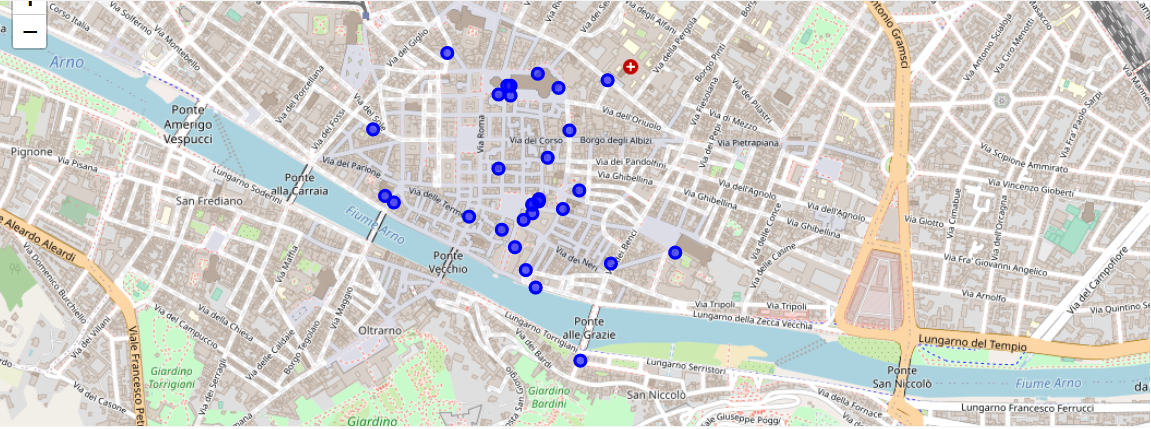

**2.2.4 Searching churches and creating dataframe**

Now the previous procedure seen for the researc about museums will be applied on churches.

First of all, define a query to search churches (in italian *chiesa* means church).

In [12]:
search_query_church = 'Chiesa'
radius = 500
print(search_query_church + ' .... OK!')

Chiesa .... OK!


Define the corresponding URL

In [13]:
url_church = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query_church, radius, LIMIT)
url_church

'https://api.foursquare.com/v2/venues/search?client_id=Y2E14U4GP44DD3R0E1MLC51OSZ33I0QUJ1RTVXFGM2Y4NZBB&client_secret=3LJYB5GP2QSSJ04W5F2ZGWOSVPOIVRN0FUMQ1IQYORDZ2OD4&ll=43.7698712,11.2555757&oauth_token=SBC5N30W3PLCPW5RNKMJBRM3HYTAZRO4LMUHMYIARTS13MEM&v=20180604&query=Chiesa&radius=500&limit=30'

Send the GET result and examine the resutls

In [14]:
results = requests.get(url_church).json()
results

{'meta': {'code': 200, 'requestId': '60aff62c28767b13725faea2'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '51221e06e4b0b9b410cbdf62',
    'name': 'Chiesa di San Carlo dei Lombardi',
    'location': {'lat': 43.77066521192117,
     'lng': 11.255226315740265,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.77066521192117,
       'lng': 11.255226315740265}],
     'distance': 92,
     'cc': 'IT',
     'city': 'Firenze',
     'state': 'Toscana',
     'country': 'Italia',
     'formattedAddress': ['Firenze Toscana', 'Italia']},
    'categories': [{'id': '4bf58dd8d48988d132941735',
      'name': 'Church',
      'pluralName': 'Churches',
      'shortName': 'Church',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_church_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1622144556',
    'hasPerk': False},
   {'id': '4c9f024154c8a1cd6678934b',
    'name':

Get relevant part of JSON and transform it into a pandas dataframe

In [15]:
# assign relevant part of JSON to venues
venues_church = results['response']['venues']

# tranform venues into a dataframe
df_church = json_normalize(venues_church)
df_church.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


id                              name  \
0  51221e06e4b0b9b410cbdf62  Chiesa di San Carlo dei Lombardi   
1  4c9f024154c8a1cd6678934b          Chiesa di Santa Felicita   
2  4bc6fd362f94d13a7a0c117f            Chiesa di Orsanmichele   
3  4c62a105e1621b8d83d52353               Orzanmichele Chiesa   
4  4c629b7fec94a593479a29ca                   Chiesa di Dante   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d132941735', 'name': 'C...  v-1622144556    False   
1  [{'id': '4bf58dd8d48988d132941735', 'name': 'C...  v-1622144556    False   
2  [{'id': '4bf58dd8d48988d132941735', 'name': 'C...  v-1622144556    False   
3  [{'id': '4bf58dd8d48988d181941735', 'name': 'M...  v-1622144556    False   
4  [{'id': '4bf58dd8d48988d132941735', 'name': 'C...  v-1622144556    False   

   location.lat  location.lng  \
0     43.770665     11.255226   
1     43.766968     11.252400   
2     43.770671     11.255205   
3     43.769931     11.254812   
4     43.771241     11.257141   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 43.77066521192117...                 92   
1  [{'label': 'display', 'lat': 43.76696765452083...                411   
2  [{'label': 'display', 'lat': 43.7706709023181,...                 93   
3  [{'label': 'display', 'lat': 43.76993130530206...                 61   
4  [{'label': 'display', 'lat': 43.77124068518998...                197   

  location.cc location.city location.state location.country  \
0          IT       Firenze        Toscana           Italia   
1          IT       Firenze        Toscana           Italia   
2          IT       Firenze        Toscana           Italia   
3          IT       Firenze        Toscana           Italia   
4          IT       Firenze        Toscana           Italia   

                           location.formattedAddress  \
0                          [Firenze Toscana, Italia]   
1  [Piazza di Santa Felicita, 50125 Firenze Tosca...   
2  [Via dei Calzaiuoli, 50127 Firenze Toscana, It...   
3  [Via dei Calzaioli, 14-red-32-red, 50122 Firen...   
4  [Via Santa Margherita, 50123 Firenze Toscana, ...   

                   location.address location.postalCode location.neighborhood  \
0                               NaN                 NaN                   NaN   
1          Piazza di Santa Felicita               50125                   NaN   
2                Via dei Calzaiuoli               50127                   NaN   
3  Via dei Calzaioli, 14-red-32-red               50122                   NaN   
4              Via Santa Margherita               50123                   NaN   

  location.crossStreet  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

Define information of interest and filter dataframe

In [16]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_church = ['name', 'categories'] + [col for col in df_church.columns if col.startswith('location.')] + ['id']
df_church_filtered = df_church.loc[:, filtered_columns_church]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_church_filtered['categories'] = df_church_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_church_filtered.columns = [column.split('.')[-1] for column in df_church_filtered.columns]

df_church_filtered.head()

name categories        lat        lng  \
0  Chiesa di San Carlo dei Lombardi     Church  43.770665  11.255226   
1          Chiesa di Santa Felicita     Church  43.766968  11.252400   
2            Chiesa di Orsanmichele     Church  43.770671  11.255205   
3               Orzanmichele Chiesa     Museum  43.769931  11.254812   
4                   Chiesa di Dante     Church  43.771241  11.257141   

                                      labeledLatLngs  distance  cc     city  \
0  [{'label': 'display', 'lat': 43.77066521192117...        92  IT  Firenze   
1  [{'label': 'display', 'lat': 43.76696765452083...       411  IT  Firenze   
2  [{'label': 'display', 'lat': 43.7706709023181,...        93  IT  Firenze   
3  [{'label': 'display', 'lat': 43.76993130530206...        61  IT  Firenze   
4  [{'label': 'display', 'lat': 43.77124068518998...       197  IT  Firenze   

     state country                                   formattedAddress  \
0  Toscana  Italia                          [Firenze Toscana, Italia]   
1  Toscana  Italia  [Piazza di Santa Felicita, 50125 Firenze Tosca...   
2  Toscana  Italia  [Via dei Calzaiuoli, 50127 Firenze Toscana, It...   
3  Toscana  Italia  [Via dei Calzaioli, 14-red-32-red, 50122 Firen...   
4  Toscana  Italia  [Via Santa Margherita, 50123 Firenze Toscana, ...   

                            address postalCode neighborhood crossStreet  \
0                               NaN        NaN          NaN         NaN   
1          Piazza di Santa Felicita      50125          NaN         NaN   
2                Via dei Calzaiuoli      50127          NaN         NaN   
3  Via dei Calzaioli, 14-red-32-red      50122          NaN         NaN   
4              Via Santa Margherita      50123          NaN         NaN   

                         id  
0  51221e06e4b0b9b410cbdf62  
1  4c9f024154c8a1cd6678934b  
2  4bc6fd362f94d13a7a0c117f  
3  4c62a105e1621b8d83d52353  
4  4c629b7fec94a593479a29ca

Now some column will be eliminated, mantaining only name, category, address, latitude and longitude.

In [17]:
df_church_filtered = df_church_filtered[['name','categories', 'address','lat','lng']]
df_church_filtered.head()

name categories  \
0  Chiesa di San Carlo dei Lombardi     Church   
1          Chiesa di Santa Felicita     Church   
2            Chiesa di Orsanmichele     Church   
3               Orzanmichele Chiesa     Museum   
4                   Chiesa di Dante     Church   

                            address        lat        lng  
0                               NaN  43.770665  11.255226  
1          Piazza di Santa Felicita  43.766968  11.252400  
2                Via dei Calzaiuoli  43.770671  11.255205  
3  Via dei Calzaioli, 14-red-32-red  43.769931  11.254812  
4              Via Santa Margherita  43.771241  11.257141

Let's have a look on the categories

In [18]:
df_church_filtered['categories'].value_counts()

Church    25
Museum     1
Name: categories, dtype: int64

Visualize the position of the curches on the map

In [19]:
venues_map_church = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred in Florence

# blue circles represent curches in Florence
for lat, lng, label in zip(df_church_filtered.lat, df_church_filtered.lng, df_church_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_church)

# display map
venues_map_church

**NOTE**: the following image is insetred in order to be seen on github.

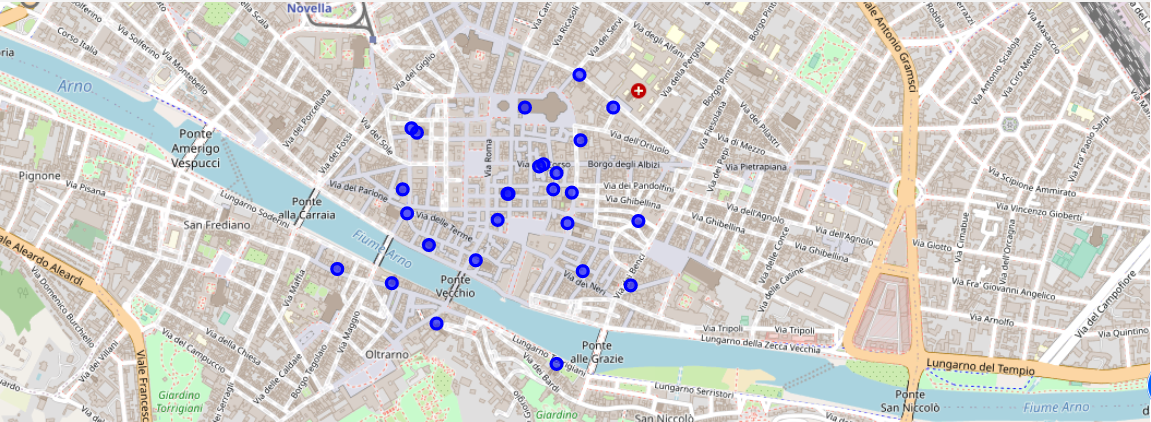

**2.2.5 Unite churches and museums in a unique dataframe**

Let's have a look about the shape of the previous dataframe

In [20]:
print(df_museum_filtered.shape)
print(df_church_filtered.shape)

(30, 5)
(26, 5)


Now unite the dataframes about churches and museums

In [21]:
df_total = df_museum_filtered.append(df_church_filtered, ignore_index = True)
df_total.head()

name      categories  \
0                                        Gucci Museo          Museum   
1                         Museo dell'Opera del Duomo          Museum   
2            Museo di Palazzo Vecchio (Museo Civico)      Art Museum   
3                       Museo Nazionale del Bargello      Art Museum   
4  Museo Galileo - Istituto e Museo di Storia del...  Science Museum   

                     address        lat        lng  
0  Piazza Della Signoria, 10  43.769762  11.256747  
1       Via della Canonica 1  43.772988  11.257492  
2      Piazza della Signoria  43.769422  11.256502  
3      Via del Proconsolo, 4  43.770058  11.258340  
4         Piazza dei Giudici  43.767799  11.256202

In [22]:
df_total.shape

(56, 5)

The shape of the final data frame correspond to the sum of the previous ones.

Now let's visualize churches and museums on a map

In [23]:
venues_map_total = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred in Florence

# the blue circles represent Florence museums and churches
for lat, lng, label in zip(df_total.lat, df_total.lng, df_total.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_total)

# display map
venues_map_total

**NOTE**: the following image is insetred in order to be seen on github.

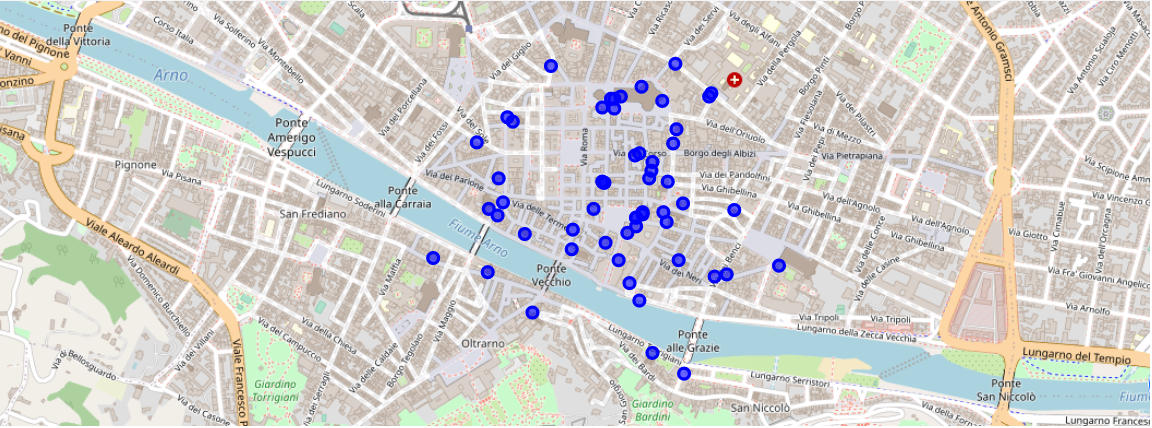

**2.2.6 Searching hotels**

Now define a query to search hotels in Florence.


In [24]:
search_query_hotel = 'Hotel'
radius = 500
print(search_query_hotel + ' .... OK!')

Hotel .... OK!


Define the corresponding URL

In [25]:
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query_hotel, radius, LIMIT)
url_hotel

'https://api.foursquare.com/v2/venues/search?client_id=Y2E14U4GP44DD3R0E1MLC51OSZ33I0QUJ1RTVXFGM2Y4NZBB&client_secret=3LJYB5GP2QSSJ04W5F2ZGWOSVPOIVRN0FUMQ1IQYORDZ2OD4&ll=43.7698712,11.2555757&oauth_token=SBC5N30W3PLCPW5RNKMJBRM3HYTAZRO4LMUHMYIARTS13MEM&v=20180604&query=Hotel&radius=500&limit=30'

Send the GET request and examine the results

In [26]:
results_hotel = requests.get(url_hotel).json()
results_hotel

{'meta': {'code': 200, 'requestId': '60aff6b178d1ac301d70dc9a'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '5b5cb0e8d03360002cac6465',
    'name': 'Hotel Savoy Firenze',
    'location': {'address': 'Piazza Della Repubblica 7',
     'lat': 43.77188419874087,
     'lng': 11.254516474382802,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.77188419874087,
       'lng': 11.254516474382802}],
     'distance': 239,
     'postalCode': '50123',
     'cc': 'IT',
     'city': 'Firenze',
     'state': 'Toscana',
     'country': 'Italia',
     'formattedAddress': ['Piazza Della Repubblica 7',
      '50123 Firenze Toscana',
      'Italia']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'referralId

Get relevant part of JSON and transform it into a pandas dataframe

In [27]:
# assign relevant part of JSON to venues
venues_hotel = results_hotel['response']['venues']

# tranform venues into a dataframe
df_hotel = json_normalize(venues_hotel)
df_hotel.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


id                  name  \
0  5b5cb0e8d03360002cac6465   Hotel Savoy Firenze   
1  4c15708177cea5932643d260   Relais Hotel Uffizi   
2  4d95ac749079b1f77604e609      Hotel Calzaiuoli   
3  4bc8848fdc55eee14a85e8ac  Hotel Bernini Palace   
4  5cd89186db1d81002cb6e9d8   Il Gattopardo Hotel   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...  v-1622144689    False   
1  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...  v-1622144689    False   
2  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...  v-1622144689    False   
3  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...  v-1622144689    False   
4  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...  v-1622144689    False   

            location.address  location.lat  location.lng  \
0  Piazza Della Repubblica 7     43.771884     11.254516   
1            Via del buco 16     43.769115     11.254923   
2                        NaN     43.771324     11.255368   
3  Piazza di San Firenze, 29     43.769440     11.257540   
4                        NaN     43.770559     11.256459   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 43.77188419874087...                239   
1  [{'label': 'display', 'lat': 43.76911484178026...                 99   
2  [{'label': 'display', 'lat': 43.77132414522816...                162   
3  [{'label': 'display', 'lat': 43.76944, 'lng': ...                165   
4  [{'label': 'display', 'lat': 43.770559, 'lng':...                104   

  location.postalCode location.cc location.city location.state  \
0               50123          IT       Firenze        Toscana   
1                 NaN          IT       Firenze        Toscana   
2                 NaN          IT           NaN            NaN   
3               50100          IT       Firenze        Toscana   
4               50122          IT       Firenze        Toscana   

  location.country                          location.formattedAddress  \
0           Italia  [Piazza Della Repubblica 7, 50123 Firenze Tosc...   
1           Italia         [Via del buco 16, Firenze Toscana, Italia]   
2           Italia                                           [Italia]   
3           Italia  [Piazza di San Firenze, 29 (Borgo de' Greci), ...   
4           Italia                    [50122 Firenze Toscana, Italia]   

  location.crossStreet venuePage.id  
0                  NaN          NaN  
1                  NaN          NaN  
2                  NaN          NaN  
3      Borgo de' Greci          NaN  
4                  NaN          NaN

Define information of interest and filter dataframe


In [28]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_hotel = ['name', 'categories'] + [col for col in df_hotel.columns if col.startswith('location.')] + ['id']
df_hotel_filtered = df_hotel.loc[:, filtered_columns_hotel]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_hotel_filtered['categories'] = df_hotel_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_hotel_filtered.columns = [column.split('.')[-1] for column in df_hotel_filtered.columns]

df_hotel_filtered.head()

name categories                    address        lat  \
0   Hotel Savoy Firenze      Hotel  Piazza Della Repubblica 7  43.771884   
1   Relais Hotel Uffizi      Hotel            Via del buco 16  43.769115   
2      Hotel Calzaiuoli      Hotel                        NaN  43.771324   
3  Hotel Bernini Palace      Hotel  Piazza di San Firenze, 29  43.769440   
4   Il Gattopardo Hotel      Hotel                        NaN  43.770559   

         lng                                     labeledLatLngs  distance  \
0  11.254516  [{'label': 'display', 'lat': 43.77188419874087...       239   
1  11.254923  [{'label': 'display', 'lat': 43.76911484178026...        99   
2  11.255368  [{'label': 'display', 'lat': 43.77132414522816...       162   
3  11.257540  [{'label': 'display', 'lat': 43.76944, 'lng': ...       165   
4  11.256459  [{'label': 'display', 'lat': 43.770559, 'lng':...       104   

  postalCode  cc     city    state country  \
0      50123  IT  Firenze  Toscana  Italia   
1        NaN  IT  Firenze  Toscana  Italia   
2        NaN  IT      NaN      NaN  Italia   
3      50100  IT  Firenze  Toscana  Italia   
4      50122  IT  Firenze  Toscana  Italia   

                                    formattedAddress      crossStreet  \
0  [Piazza Della Repubblica 7, 50123 Firenze Tosc...              NaN   
1         [Via del buco 16, Firenze Toscana, Italia]              NaN   
2                                           [Italia]              NaN   
3  [Piazza di San Firenze, 29 (Borgo de' Greci), ...  Borgo de' Greci   
4                    [50122 Firenze Toscana, Italia]              NaN   

                         id  
0  5b5cb0e8d03360002cac6465  
1  4c15708177cea5932643d260  
2  4d95ac749079b1f77604e609  
3  4bc8848fdc55eee14a85e8ac  
4  5cd89186db1d81002cb6e9d8

Now some column will be eliminated, mantaining only name, category, address, latitude and longitude.

In [29]:
df_hotel_filtered = df_hotel_filtered[['name','categories', 'address','lat','lng']]
df_hotel_filtered

name       categories  \
0                             Hotel Savoy Firenze            Hotel   
1                             Relais Hotel Uffizi            Hotel   
2                                Hotel Calzaiuoli            Hotel   
3                            Hotel Bernini Palace            Hotel   
4                             Il Gattopardo Hotel            Hotel   
5                              Hotel Continentale            Hotel   
6                                   HOTEL FIORINO            Hotel   
7                                Hotel Costantini            Hotel   
8                                 Hotel Milu ****            Hotel   
9                                  Hotel Lungarno            Hotel   
10                               Porta Rosa Hotel            Hotel   
11                                 Hotel Bretagna            Hotel   
12                       Golden Tower Hotel & Spa            Hotel   
13                          Hotel Laurus Al Duomo            Hotel   
14                                    Hôtel Abaco            Hotel   
15  Hotel Cerretani Firenze - MGallery by Sofitel            Hotel   
16                                    Hotel Paris            Hotel   
17                      Hotel Firenze Number Nine            Hotel   
18                                     Hotel Roma            Hotel   
19        Hotel Torre Guelfa (Palazzo Acciaiuoli)             None   
20                     De La Ville Hotel Florence            Hotel   
21                            Fh Hotel Calzaiuoli            Hotel   
22                            Hotel Relais Uffizi            Hotel   
23                          Hotel Por Santa Maria            Hotel   
24                                 Hotel Calimala            Hotel   
25                      Hotel Lungarno - Terrazza   Scenic Lookout   
26                    Olga's House Hotel Florence             None   
27                                 Hotel Cristina            Hotel   
28                             Hotel Torre Guelfa            Hotel   
29                        La Casa Del garbo Hotel  Bed & Breakfast   

                                      address        lat        lng  
0                   Piazza Della Repubblica 7  43.771884  11.254516  
1                             Via del buco 16  43.769115  11.254923  
2                                         NaN  43.771324  11.255368  
3                   Piazza di San Firenze, 29  43.769440  11.257540  
4                                         NaN  43.770559  11.256459  
5                         Vicolo dell'Oro, 6R  43.768586  11.253390  
6                      via Osteria del Guanto  43.768079  11.257313  
7                       Via dei Calzaiuoli 13  43.772342  11.255144  
8                        Via de' Tornabuoni 8  43.770876  11.251488  
9                         Borgo San Jacopo 14  43.768222  11.251727  
10                          VIA PORTA ROSA 19  43.770606  11.252022  
11                         Lungarno Corsini 6  43.769846  11.249940  
12                 Piazza degli Strozzi, 11/R  43.770574  11.252066  
13                          Via Cerretani 54R  43.773470  11.252886  
14                          Via dei Banchi, 1  43.773456  11.252000  
15                        Via De Cerretani 68  43.773542  11.252264  
16                           Via dei Banchi 2  43.773626  11.251450  
17                            Via dei Conti 9  43.774450  11.252971  
18              Piazza Santa Maria Novella, 8  43.772834  11.249563  
19                 Via Borgo S.S. Apostoli, 8  43.769732  11.255471  
20                         Piazza Antinori, 1  43.772328  11.251015  
21                      Via dei Calzaiuoli, 6  43.770150  11.255290  
22                        16 Chiasso del Buco  43.769115  11.254902  
23                                        NaN  43.769803  11.254303  
24                             Via Calimala 2  43.770316  11.254488  
25                                        NaN  43.7680

Let's visualize the hotels on the map

In [30]:
venues_map_hotel = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred in Florence

# the blue circles represent Florence hotels
for lat, lng, label in zip(df_hotel_filtered.lat, df_hotel_filtered.lng, df_hotel_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_hotel)

# display map
venues_map_hotel

**NOTE**: the following image is insetred in order to be seen on github.

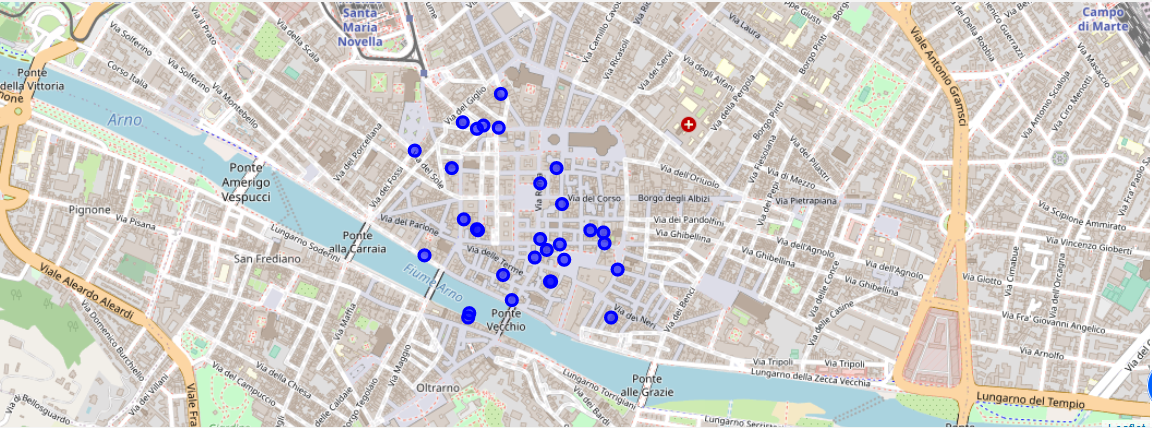